# Working with text

In this problem, we will load movie reviews from IMDB, a famous movie database and website, and we will try to predict whether the review is positive or negative.

First, the function we will use to diagnose the performance of our model

In [1]:
! pip install keras

In [2]:
%pylab inline
plt.style.use('seaborn-talk')

Populating the interactive namespace from numpy and matplotlib


In [0]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()  

## Input data

In [4]:
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
# Run this to download the data prior to the lecture
train, test = imdb.load_data(num_words=10000) #Ponemos un límite máximo de un vocabulario de 10000 palabras

In [7]:
type(train)

tuple

In [0]:
text_train, labels_train = train
text_test, labels_test = test

In [11]:
text_train.shape
# Tienen 25000 textos

(25000,)

In [13]:
labels_train.shape

(25000,)

In [16]:
print(text_train[0])
len(text_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


218

In [17]:
len(text_train[1])

189

In [18]:
text_train[0][0:10]
# Estos números son índices de palabras

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

Why are these *texts* numbers?

In [19]:
text_test.shape

(25000,)

In [22]:
labels_train[0]
# Esto nos dice si los comentarios son positivos o negativos. 1 positivo 0 negativo

1

These are actually indices in a word index

In [23]:
word_index = imdb.get_word_index()
# Este es el índice de palabras. Las claves son palabras y los valores son los números

1646592/1641221 [==============================] - 0s 0us/step


In [24]:
word_index['dog']

909

In [25]:
word_index['the']

1

In [26]:
word_index['car']

516

In [32]:
word_index['worst']

246

In [0]:
reversed_word_index = dict((value, key) for (key, value) in word_index.items())

In [0]:
def get_text_from_vector(v):
    return ' '.join(reversed_word_index.get(i-3, '?') for i in v)

In [31]:
get_text_from_vector(text_train[4][0:25])

"? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can"

In [30]:
labels_train[4]

0

### Prepare data for the network

We need to prepare the data to be an input to the neural network. The input must be a **tensor**. In our case, all vectors should be of the same length. But not all reviews are of the same size, so the vectors will have different sizes. How can we overcome this problem?

* We can zero-pad the vectors, so all of them have the same size, and then combine them in a tensor. We would need to add an *Embedding* layer to learn **word embeddings** (more later)
* Or we can use 1-HOT encoding

In both cases, we will have vectors of size $10^4$ (the maximum number of words). Let's go with the 1-HOT encoding.

In [0]:
from keras.preprocessing import text

In [0]:
tokenizer = text.Tokenizer(num_words = 10000)

In [0]:
# tokenizer.texts_to_sequences Dado un texto te genera una secuencia de números como los que tenemos arriba
matrix_train = tokenizer.sequences_to_matrix(text_train, mode = "binary") # De la lista de secuencias me pasa a una matriz

In [38]:
matrix_train.shape
# De las 10000 columnas cada una de ellas es la palabra de nuestro vocabulario
# De las 25000 filas pone 0 u 1 si aparece esa palabra en el texto. No cuenta la repetición de palabras

(25000, 10000)

In [0]:
matrix_test = tokenizer.sequences_to_matrix(text_test, mode = "binary")

In [40]:
matrix_test.shape

(25000, 10000)

**EXERCISE 1**. Can you see any problem with this approach? How would you solve it?

**EXERCISE 2**. Do we need to transform the labels? Why? Or why not?
Las etiquetas son 0 y 1, son buenos valores para la red neuronal. Así que lo dejamos así

## Let's build the model

In [0]:
from keras import models
from keras import layers

In [0]:
# el modelo m2 será el embeddings
m1 = models.Sequential()
m1.add(layers.Dense(128, input_shape=(10000,), activation = 'relu'))
# m1.add(layers.Dense(64, activation = 'relu'))
# m1.add(layers.Dense(16, activation = 'relu'))
m1.add(layers.Dense(1, activation = 'sigmoid')) # La salida es un número que pueden ser dos, o 0 o 1, así que ponemos activación sigmoid


In [56]:
m1.summary() # Para ver lo complejo del modelo

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 1,280,257
Trainable params: 1,280,257
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

In [0]:
m1.compile(
    optimizer=optimizers.adam(), 
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
) 
# Utilizamos esta vez el optimizador adam, muy parecido con el de los otros notebooks. Es cuestión de gustos
# La función de pérdidas vamos a usar al entropía cruzada binaria, son para dos clases, es como la de los otros notebooks pero ahora solo hay dos
# Utilizamos el binary_accuracy para la métrica


In [60]:
h1 = m1.fit(matrix_train, labels_train, batch_size = 1024, epochs = 20, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 224us/step - loss: 0.4539 - binary_accuracy: 0.8081 - val_loss: 0.3107 - val_binary_accuracy: 0.8798
Epoch 2/20
20000/20000 [==============================] - 4s 219us/step - loss: 0.2291 - binary_accuracy: 0.9186 - val_loss: 0.2761 - val_binary_accuracy: 0.8898
Epoch 3/20
20000/20000 [==============================] - 4s 219us/step - loss: 0.1677 - binary_accuracy: 0.9429 - val_loss: 0.2794 - val_binary_accuracy: 0.8896
Epoch 4/20
20000/20000 [==============================] - 4s 207us/step - loss: 0.1341 - binary_accuracy: 0.9576 - val_loss: 0.2929 - val_binary_accuracy: 0.8860
Epoch 5/20
20000/20000 [==============================] - 4s 206us/step - loss: 0.1098 - binary_accuracy: 0.9675 - val_loss: 0.3078 - val_binary_accuracy: 0.8842
Epoch 6/20
20000/20000 [==============================] - 4s 203us/step - loss: 0.0907 - binary_accuracy: 0.9757 - val_loss: 0.3278 - val_bin

20000/20000 [==============================] - 4s 202us/step - loss: 0.0640 - binary_accuracy: 0.9861 - val_loss: 0.3771 - val_binary_accuracy: 0.8750
Epoch 9/20
20000/20000 [==============================] - 4s 202us/step - loss: 0.0547 - binary_accuracy: 0.9901 - val_loss: 0.3998 - val_binary_accuracy: 0.8766
Epoch 10/20
20000/20000 [==============================] - 4s 203us/step - loss: 0.0459 - binary_accuracy: 0.9931 - val_loss: 0.4264 - val_binary_accuracy: 0.8736
Epoch 11/20
20000/20000 [==============================] - 4s 203us/step - loss: 0.0385 - binary_accuracy: 0.9950 - val_loss: 0.4518 - val_binary_accuracy: 0.8744
Epoch 12/20
20000/20000 [==============================] - 4s 203us/step - loss: 0.0330 - binary_accuracy: 0.9961 - val_loss: 0.4755 - val_binary_accuracy: 0.8708
Epoch 13/20
20000/20000 [==============================] - 4s 204us/step - loss: 0.0283 - binary_accuracy: 0.9974 - val_loss: 0.4997 - val_binary_accuracy: 0.8710
Epoch 14/20
20000/20000 [==========

20000/20000 [==============================] - 4s 205us/step - loss: 0.0206 - binary_accuracy: 0.9990 - val_loss: 0.5438 - val_binary_accuracy: 0.8716
Epoch 16/20
20000/20000 [==============================] - 4s 204us/step - loss: 0.0175 - binary_accuracy: 0.9992 - val_loss: 0.5655 - val_binary_accuracy: 0.8676
Epoch 17/20
20000/20000 [==============================] - 4s 204us/step - loss: 0.0153 - binary_accuracy: 0.9997 - val_loss: 0.5820 - val_binary_accuracy: 0.8696
Epoch 18/20
20000/20000 [==============================] - 4s 202us/step - loss: 0.0132 - binary_accuracy: 1.0000 - val_loss: 0.6025 - val_binary_accuracy: 0.8700
Epoch 19/20
20000/20000 [==============================] - 4s 204us/step - loss: 0.0116 - binary_accuracy: 1.0000 - val_loss: 0.6197 - val_binary_accuracy: 0.8708
Epoch 20/20
20000/20000 [==============================] - 4s 203us/step - loss: 0.0102 - binary_accuracy: 1.0000 - val_loss: 0.6371 - val_binary_accuracy: 0.8670


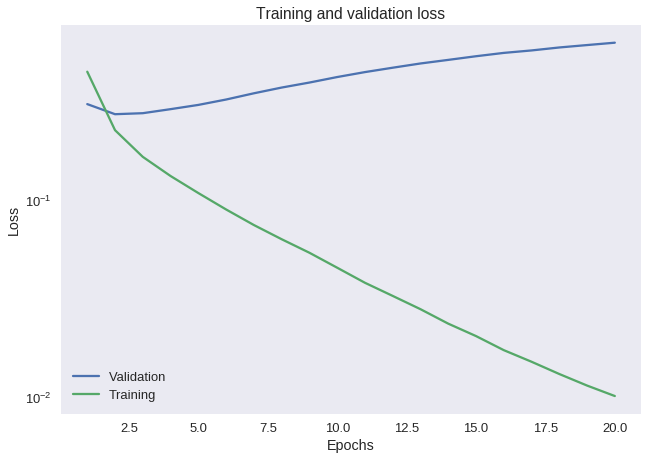

In [61]:
plot_metric(h1, 'loss')

In [0]:
# Si la validation loss va subiendo es un síntoma de overfitting, el modelo no es capaz de generalizar, se quitan capas
# Underfitting sería que validation va bajando pero vemos que no suficiente. Se meten capas

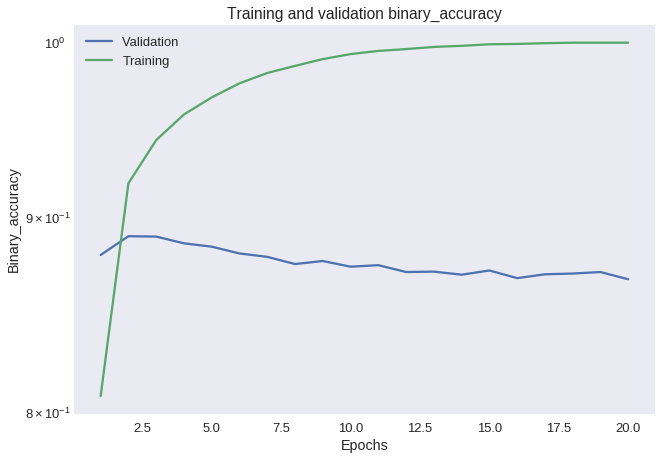

In [62]:
plot_metric(h1, "binary_accuracy")

In [0]:
# Vemos que la curva del training es buena, se acerca al 1, el accuracy está bien
# Pero la validación es malísima, no es capaz de predecir cosas que no ha visto. Hay overfitting
# El modelo es malo.

# Analyze performance

In [63]:
loss, acc = m1.evaluate(matrix_test, labels_test)

25000/25000 [==============================] - 5s 199us/step


In [64]:
loss, acc

(0.6846111100625992, 0.85316)

In [0]:
# El modelo es malo pero nos ha dado un accuracy de un 85%
# Puede que el test esté desbalanceado, imaginemos que de los 25000 comentarios 24000 sean positivos. Habría que haber revisado eso en el principio
# Hemos perdido información a la hora de hacer la matriz y eso puede explicar el alto valor del accuracy
# La métrica de accuracy es una mierda. 
# Para evaluar mejor el modelo podríamos ver el precission and recall(matriz de confusión), las curvas roc

We cannot find a satisfactory model with what we have learned so far. Is there any way to have a better representation of text that can provide better results?

In [84]:
get_text_from_vector(text_test[4][0:15])

"? like some other people wrote i'm a die hard mario fan and i loved"

In [85]:
labels_test[4]

1

In [86]:
m1.predict(matrix_test[4:5]) >= 0.5

array([[ True]])

# Word embeddings

Using 1-HOT encoded vectors produce large and sparse tensors, that are difficult to learn from using a neural network. Word embeddings are compact vectors, representing words in a vector space. These vectors are learnt in a neural network, with a layer of type *Embedding*. We can also even use pre-trained word embeddings, to improve our model

![](./imgs/07_embeddings.png)

To generate  an embedding, we need to tokenize the text, transforming words into indices, and then we use these lists of numbers to produce the vectorial representation:

![](./imgs/08_embeddings.png)

More info:
* http://www.offconvex.org/2015/12/12/word-embeddings-1/
* http://www.offconvex.org/2016/02/14/word-embeddings-2/

In [0]:
# Con el embeddings vamos a dejar a la red neuronal que sea ella la que haga las secuencias de los números del texto
# Con esto el número de la palabra importa

## Input data for word embeddings

In [0]:
max_words = 10000
max_len = 100
embeddings_dim = 12 #Se pone poco por economía, cuanto más mejor

In [0]:
# Como transformo las cosas a embeddings?

In [0]:
from keras.preprocessing import sequence

In [0]:
# Primero hacemos la matriz como antes, pero la rellenamos de ceros para que dimensiones consistentes para pasarlo al modelo. Lo ponemos en 100 por economía, para que el modelo entrene rápido
# El texto sigue conservando sus propiedades, orden, palabras, repetidas, solo hemos cortado en 100 palabras.
pad_train = sequence.pad_sequences(text_train, maxlen = max_len)
pad_test = sequence.pad_sequences(text_test, maxlen = max_len)

## Let's build the model with embeddings

In [0]:
m2 = models.Sequential()
m2.add(layers.Embedding(max_words, embeddings_dim)) #Espacio vectorial de 10000 vectores diferentes (cada palabra)
m2.add(layers.LSTM(32, return_sequences = True))
m2.add(layers.LSTM(32))
# m2.add(layers.SimpleRNN(32, return_sequences=True)) #Aprovecha la información de que las palabras están juntas. Aprovecha el orden de las palabras
# m2.add(layers.SimpleRNN(32, return_sequences=True)) # El valor de salida de cada una de estas capas, puede ser un valor o la secuencia entera
# m2.add(layers.SimpleRNN(32, return_sequences=True)) # Por eso ponemos return_sequences = True
# # m2.add(layers.SimpleRNN(32, return_sequences=True))

# m2.add(layers.Dense(128, activation = 'relu'))
# m2.add(layers.Dense(64, activation = 'relu')) # Se ponen potencias de dos para que coja más memoria del ordenador
# m2.add(layers.Dense(32, activation = 'relu')) # Las capas densas no valen para secuencias. Para ello es mejor las redes recurrentes.

m2.add(layers.Dense(1, activation = 'sigmoid'))

# Esta capa simple RNN no se usa, pero nos ayuda para explicar
# Un problema con secuencias se usa LSTM

In [124]:
m2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 12)          120000    
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 32)          5760      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 134,113
Trainable params: 134,113
Non-trainable params: 0
_________________________________________________________________


In [0]:
m2.compile(
    optimizer = optimizers.adam(),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

In [126]:
h2 = m2.fit(pad_train, labels_train.reshape(25000, 1), 
            epochs = 10, batch_size = 1024, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6925 - binary_accuracy: 0.5143 - val_loss: 0.6901 - val_binary_accuracy: 0.5958
Epoch 2/10
20000/20000 [==============================] - 20s 988us/step - loss: 0.6340 - binary_accuracy: 0.7037 - val_loss: 0.5120 - val_binary_accuracy: 0.7528
Epoch 3/10
20000/20000 [==============================] - 20s 982us/step - loss: 0.4290 - binary_accuracy: 0.8127 - val_loss: 0.4203 - val_binary_accuracy: 0.8096
Epoch 4/10
20000/20000 [==============================] - 20s 987us/step - loss: 0.3140 - binary_accuracy: 0.8740 - val_loss: 0.3808 - val_binary_accuracy: 0.8326
Epoch 5/10
20000/20000 [==============================] - 20s 984us/step - loss: 0.2448 - binary_accuracy: 0.9116 - val_loss: 0.3785 - val_binary_accuracy: 0.8364
Epoch 6/10
20000/20000 [==============================] - 20s 982us/step - loss: 0.2045 - binary_accuracy: 0.9309 - val_loss: 0.4046 - val

20000/20000 [==============================] - 20s 997us/step - loss: 0.1424 - binary_accuracy: 0.9591 - val_loss: 0.4916 - val_binary_accuracy: 0.8202
Epoch 9/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.1194 - binary_accuracy: 0.9683 - val_loss: 0.5401 - val_binary_accuracy: 0.8192
Epoch 10/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.1058 - binary_accuracy: 0.9736 - val_loss: 0.5730 - val_binary_accuracy: 0.8142


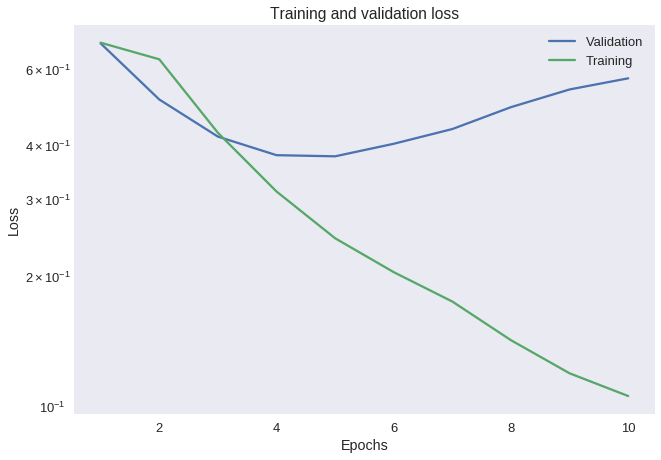

In [127]:
plot_metric(h2, 'loss')
# Vemos que se queda clavado en pocas épocas y ya no aprende más. 
# Es porque hemos puesto una sola capa. Añadimos capas

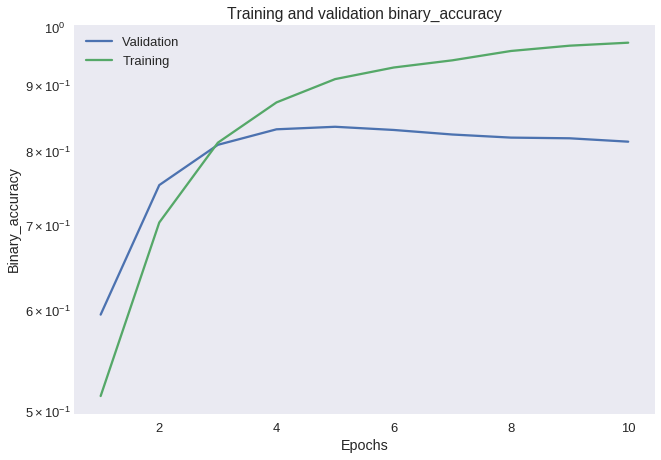

In [128]:
plot_metric(h2, 'binary_accuracy')

## Analyze performance

Not bad, with just an embedding layer, we get $75\%$ accuracy

In [129]:
loss, acc = m2.evaluate(pad_test, labels_test, batch_size = 1024)

25000/25000 [==============================] - 6s 245us/step


In [130]:
loss, acc

(0.5960886834335327, 0.8075999998283386)

How many reviews will be misclassified?

In [131]:
(1-acc) * len(labels_test)

4810.000004291534

Let's check some of the predictions

In [0]:
N = 123
# N = 2344

So this prediction is correct. It says the review is negative. Let's have a look at the text:

In [0]:
get_text_from_vector(test_text[N])

"? if you believe that any given war movie can make you really feel the war you need to see called the ? are flying in english it tells the story of ? ? and boris who are in love on the verge of wwii they are walking along the ? watching the ? fly by when the war starts boris is promptly sent off to war ? hides out with a family and ends up marrying the son whom she does not love boris meanwhile continues ? through the countryside fighting the nazis and experiencing all the horrors of war until he he runs out of energy when ? working in a military hospital receives this news she refuses to accept it until ? body arrives home on one of the trains simultaneously the radio ? that germany has ? and the allied powers have won the war the soviet union lost 27 million citizens but it's the start of a new era br br this movie did a very good job showing the human impact of the war not only in the battlefield but also how it affected the ? population this is definitely a movie that everyone sho

Can we find all the reviews that are wrongly classified?

In [0]:
get_text_from_vector(test_text[3])

"? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are ? involved with the actions on the screen so then why the hell can't we have night vision"

Is the classifier symmetric?

In [0]:
preds = m2.predict(pad_test)

In [133]:
preds.shape

(25000, 1)

In [134]:
preds[0:10]

array([[0.01673322],
       [0.9877071 ],
       [0.9859256 ],
       [0.0708336 ],
       [0.9921423 ],
       [0.03133363],
       [0.991026  ],
       [0.00828223],
       [0.97699964],
       [0.9893237 ]], dtype=float32)

In [0]:
preds_binary = preds >= 0.5

In [136]:
preds_binary[0:10]

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True]])

In [0]:
correct_pos = np.where(preds_binary == labels_test)

In [0]:
wrong_pos = np.where(preds_binary != labels_test)

**EXERCISE** Can you construct the confusion matrix for this model? Can you calculate the precision and recall? How does it compare to accuracy?
* See https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

**EXERCISE (more complex)** Keras decided some time ago to remove precision, recall and F1-score from the list of available metrics. Was it a good decision? Why? Why did the Keras' authors did not remove accuracy too?
* https://github.com/keras-team/keras/issues/5794
* https://github.com/keras-team/keras/issues/4592

**EXERCISE** What is the ROC curve? Could you build the ROC curve for this model? How would you use a ROC curve to evaluate a classifier?
* https://en.wikipedia.org/wiki/Receiver_operating_characteristic
* Help: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

Let's analyze wrong positives and wrong negatives separately. Then we will try to find a relationship between the words and the misclassification, both for false positives and negatives.

Now let's compare with the words of the true positives

So the most common words are very similar. Not surprising. Let's calculate the relative frequency of each word, and then find what are the words with the highest difference in relative frequency.

We see words such as *great*, *best*, *excellent*, which have a large difference between the true and the false positives. So false positives seem to lack some extreme words, and the classifier is having a hard time trying to assign a category to those reviews.